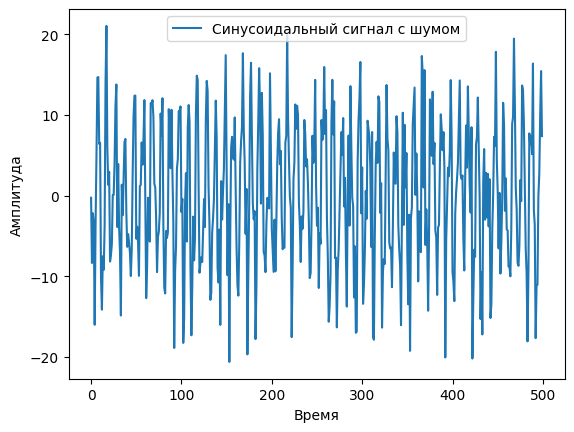

In [29]:
import numpy as np

n_samples = 500  
frequency = 0.9  
amplitude = 10  
noise_level = 5

time = np.arange(n_samples)
data = amplitude * np.sin(2 * np.pi * frequency * time) + np.random.normal(loc=0, scale=noise_level, size=n_samples)

np.savetxt("time_series_sinusoidal.txt", data)

import matplotlib.pyplot as plt
plt.plot(time, data, label="Синусоидальный сигнал с шумом")
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.legend()
plt.show()


Эпоха 0, суммарная ошибка: 120.4521
Эпоха 50, суммарная ошибка: 7.4171
Эпоха 100, суммарная ошибка: 7.3982
Эпоха 150, суммарная ошибка: 7.3987
Эпоха 200, суммарная ошибка: 7.3988
Эпоха 250, суммарная ошибка: 7.3989
Эпоха 300, суммарная ошибка: 7.3989
Эпоха 350, суммарная ошибка: 7.3989
Эпоха 400, суммарная ошибка: 7.3989
Эпоха 450, суммарная ошибка: 7.3989


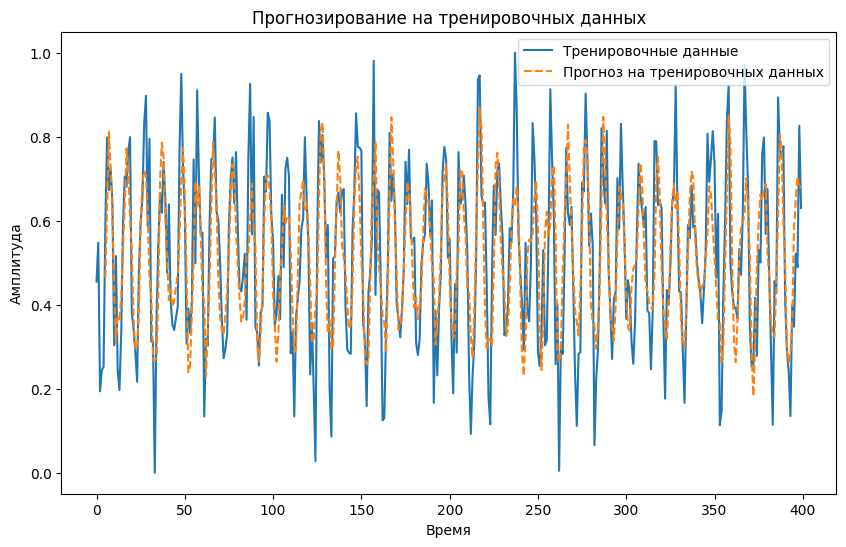

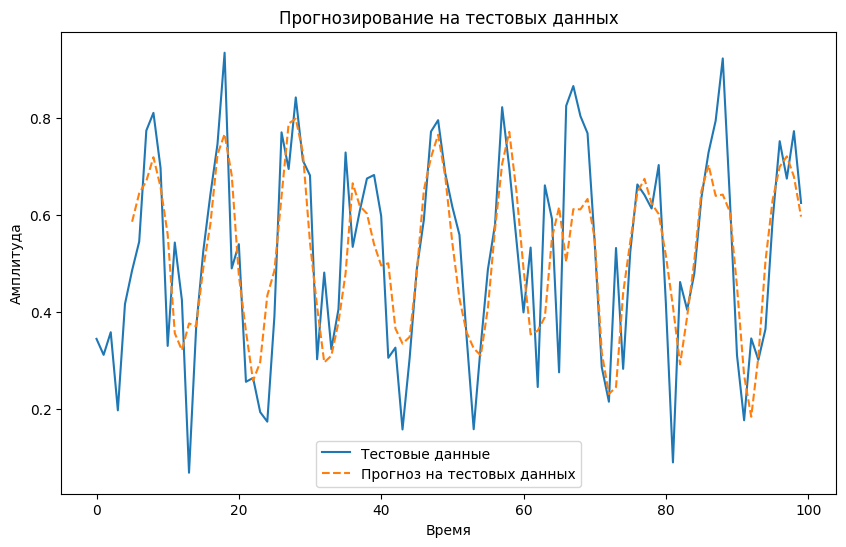

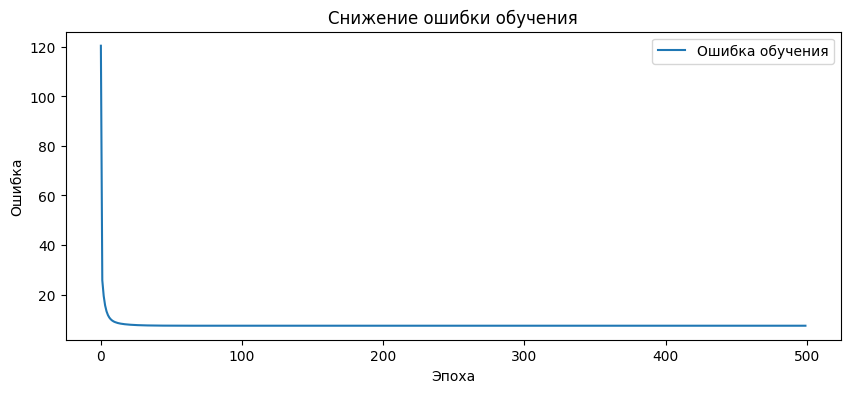

In [27]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = 500
frequency = 0.9
amplitude = 10
noise_level = 5

time = np.arange(n_samples)
data = amplitude * np.sin(2 * np.pi * frequency * time) + np.random.normal(loc=0, scale=noise_level, size=n_samples)

data = (data - np.min(data)) / (np.max(data) - np.min(data))

train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

learning_rate = 0.01
n_epochs = 500
n = 5 

weights = np.random.rand(n + 1) 
# print(weights)

def activation(x):
    return x

errors = []
for epoch in range(n_epochs):
    train_predictions = [] 
    total_error = 0
    for t in range(n, len(train_data)): 
    
        x_input = np.array([train_data[t - i - 1] for i in range(n)] + [1]) 
        target = train_data[t] 
        prediction = activation(np.dot(weights, x_input)) 
    
        error = target - prediction 
        total_error += error**2 
    
        weights += learning_rate * error * x_input 

    errors.append(total_error)
    if epoch % 50 == 0:
        print(f"Эпоха {epoch}, суммарная ошибка: {total_error:.4f}")

test_predictions = []
for t in range(n, len(test_data)):
    x_input = np.array([test_data[t - i - 1] for i in range(n)] + [1]) 
    test_predictions.append(activation(np.dot(weights, x_input)))

train_predictions = []
for t in range(n, len(train_data)):
    x_input = np.array([train_data[t - i - 1] for i in range(n)] + [1]) 
    train_predictions.append(activation(np.dot(weights, x_input)))

plt.figure(figsize=(10, 6))
plt.plot(train_data, label="Тренировочные данные")
plt.plot(range(n, len(train_data)), train_predictions, label="Прогноз на тренировочных данных", linestyle="dashed")
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.legend()
plt.title("Прогнозирование на тренировочных данных")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(test_data, label="Тестовые данные")
plt.plot(range(n, len(test_data)), test_predictions, label="Прогноз на тестовых данных", linestyle="dashed")
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.legend()
plt.title("Прогнозирование на тестовых данных")
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(errors, label="Ошибка обучения")
plt.xlabel("Эпоха")
plt.ylabel("Ошибка")
plt.legend()
plt.title("Снижение ошибки обучения")
plt.show()
